In [18]:
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

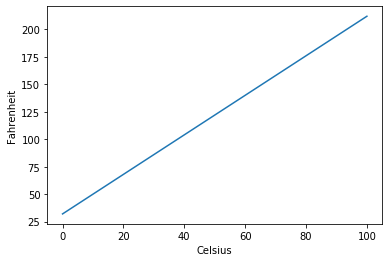

In [8]:
# Complete the function to convert C to F
def convert_scale(temps_C):
    (freeze_C, boil_C) = (0, 100)
    (freeze_F, boil_F) = (32, 212)
    change_in_C = boil_C - freeze_C
    change_in_F = boil_F - freeze_F
    slope = change_in_F / change_in_C
    intercept = freeze_F - freeze_C
    temps_F = intercept + (slope * temps_C)
    return temps_F

# Use the convert function to compute values of F and plot them
temps_C = np.linspace(0, 100, 101)
temps_F = convert_scale(temps_C)
plt.plot(temps_C, temps_F)
plt.ylabel('Fahrenheit')
plt.xlabel('Celsius')
plt.show()

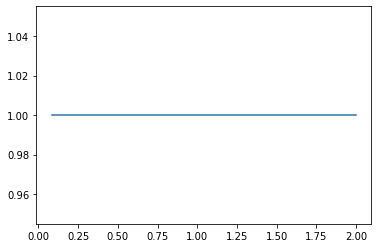

In [9]:
times=[ 0.0,0.08333333,0.16666667,0.25,0.33333333,  0.41666667, 
       0.5,0.58333333,0.66666667, 0.75 ,0.83333333,0.91666667,
  1.,1.08333333,1.16666667,1.25, 1.33333333 , 1.41666667,
  1.5,1.58333333,1.66666667,1.75, 1.83333333  ,1.91666667,
  2.0]
distances=[0.0,0.08333333,0.16666667,0.25,0.33333333,0.41666667,
0.5,0.58333333,0.66666667,0.75,0.83333333,0.91666667,
1.0,1.08333333,1.16666667,1.25,1.33333333,1.41666667,
1.5,1.58333333,1.66666667,1.75,1.83333333,1.91666667,2.0]
#print(distances)
diff_distances=np.diff(distances,)
#print(diff_distances)
diff_times=np.diff(times)
velocities=diff_distances/diff_times


v_avg = np.mean(velocities)
v_max = np.max(velocities)
v_min = np.min(velocities)
v_range = v_max - v_min

#print(velocities)
plt.plot(times[1:],velocities)
plt.show()

container_mass   = 5.8909
solution_density = 0.9021


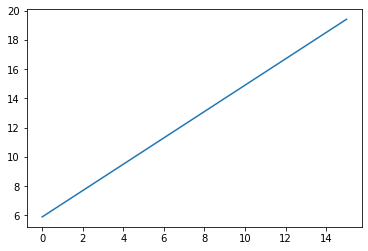

In [10]:
masses=[7.812435,7.698824,7.817183,7.872703,8.176541] 
volumes=[2.0,2.1,2.2,2.3,2.4]
df=pd.DataFrame({'masses':masses,'volumes':volumes})

model_fit = ols(formula="masses ~ volumes", data=df)
model_fit = model_fit.fit()

a0 = model_fit.params['Intercept']
a1 = model_fit.params['volumes']

# Print model parameter values with meaningful names, and compare to summary()
print( "container_mass   = {:0.4f}".format(a0) )
print( "solution_density = {:0.4f}".format(a1) )

x=np.linspace(0,15,16)
predicted_mass=a0+a1*x
plt.plot(x,predicted_mass)
plt.show()

RSS = 14444.484116328082
The minimum RSS = 14411.966787781834, came from a1 = [24.74747475]


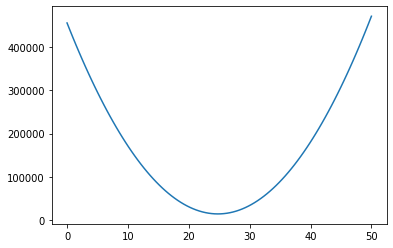

optimize library a0=152.12363843931638 and a1=24.473226785099204
ols a0 = 152.1236
ols a1 = 24.4732


In [24]:
def model(x_data, a0, a1):
    retval=[]
    for x in x_data:
        retval.append(a0+ a1*x)
    return np.array(retval);

x_data=[  0.,0.5,1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5
,6.,6.5,7.,7.5,8.,8.5,9.,9.5, 10. ]

y_data=[161.78587909,132.72560763,210.81767421,179.6837026, 181.98528167
,234.67907351,246.48971034,221.58691239,250.3924093, 206.43287615
,303.75089312,312.29865056,323.8331032, 261.9686295, 316.64806585
,337.55295912,360.13633529,369.72729852,408.0289548, 348.82736117
,394.93384188]


y_model = model(x_data, a0=150, a1=25)
#print(y_model)

#print(len(x_data),len(y_data),len(y_model))

rss = np.sum(np.square(y_model - y_data))
print("RSS = {}".format(rss))

chg_a1=np.linspace(0,50,100)

result_rss=[]
for i in chg_a1:
    y_model=model(x_data, a0=150,a1=i)
    rss = np.sum(np.square(y_model - y_data))
    result_rss.append(rss)

best_rss = np.min(result_rss) 
best_a1 = chg_a1[np.where(result_rss==best_rss)]

print('The minimum RSS = {}, came from a1 = {}'.format(best_rss, best_a1))

plt.plot(chg_a1,result_rss)    
plt.show()


###############  Optimize #########
def model_func(x,a0,a1):
    return a0 + (a1*x)


param_opt,param_cov= optimize.curve_fit(model_func, x_data, y_data)

a0= param_opt[0] #a0 is the intercept
a1= param_opt[1] #a1 is the slope

print("optimize library a0={} and a1={}".format(a0,a1))


###############   OLS ###############

df=pd.DataFrame(dict(x_name=x_data,y_name=y_data))
model_fit = ols(formula="y_name ~ x_name", data=df).fit()

a0 = model_fit.params['Intercept']
a1 = model_fit.params['x_name']

print( "ols a0 = {:0.4f}".format(a0) )
print( "ols a1 = {:0.4f}".format(a1) )

